# Setup

In [2]:
#ausführen!!!
 
import matplotlib.pyplot as plt
 
import pandas as pd
import itertools
import numpy as np
 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report
)
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report

from itertools import combinations
 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
 
import folium #for the map view of all airports
 
#loading the Dataset into a pandas dataframe
df = pd.read_csv('Airlines.csv')
allAirports = pd.read_csv('hopefullyAllAirports.csv')

# Stage 1: Data Analysis


data head:
   id Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay
0   1      CO     269         SFO       IAH          3    15     205      1
1   2      US    1558         PHX       CLT          3    15     222      1
2   3      AA    2400         LAX       DFW          3    20     165      1
3   4      AA    2466         SFO       DFW          3    20     195      1
4   5      AS     108         ANC       SEA          3    30     202      0

data shape:
(539383, 9)

data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Le

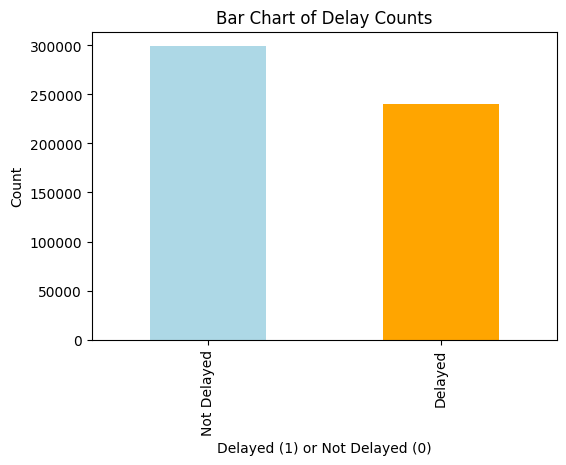

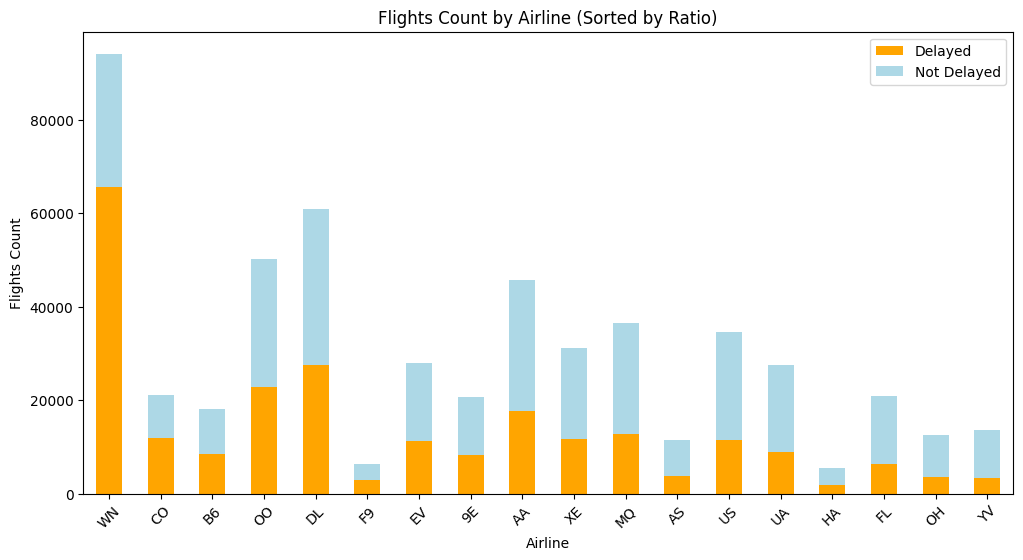

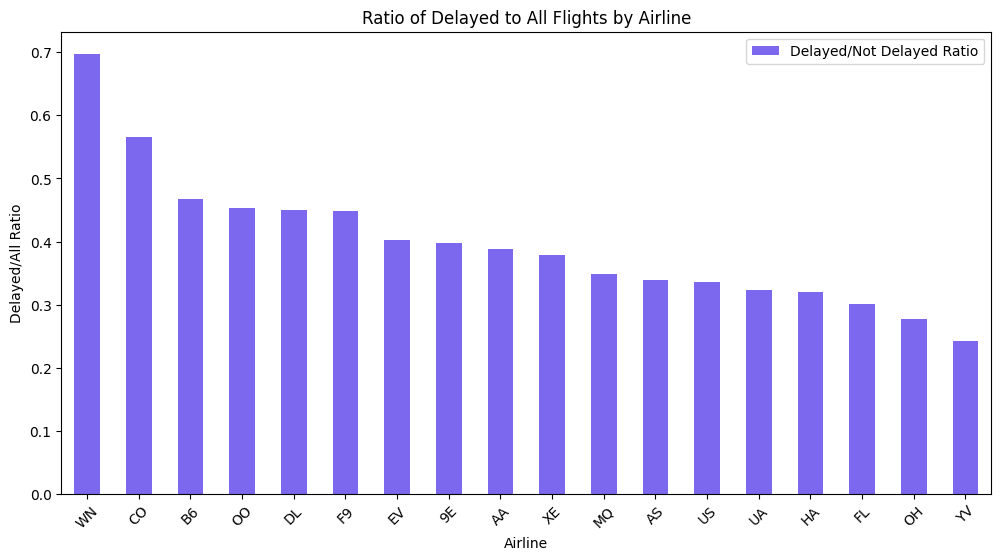

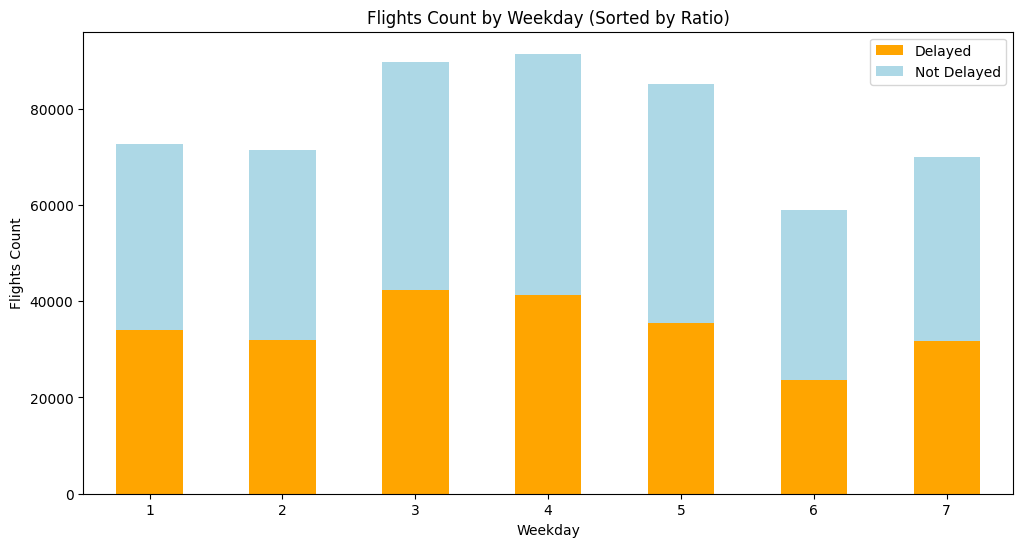

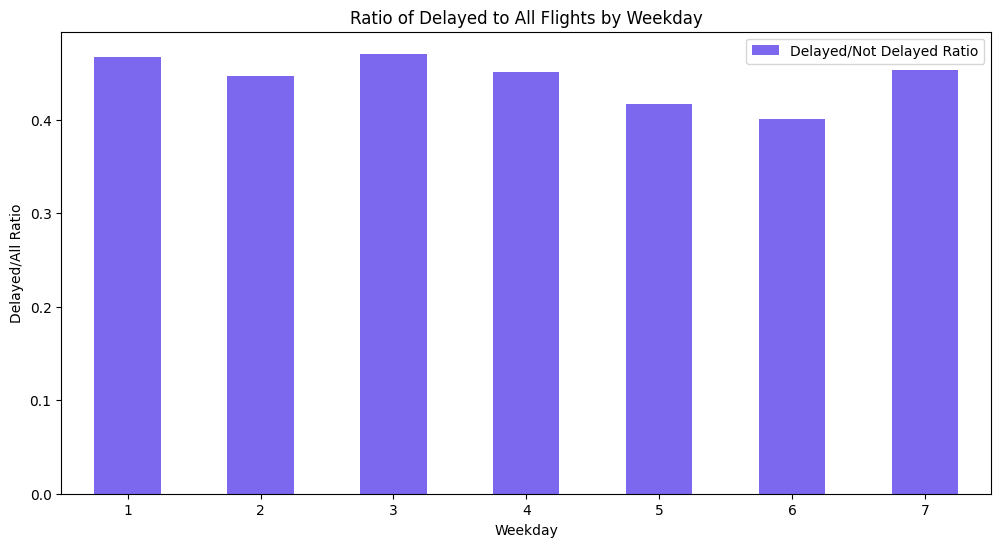

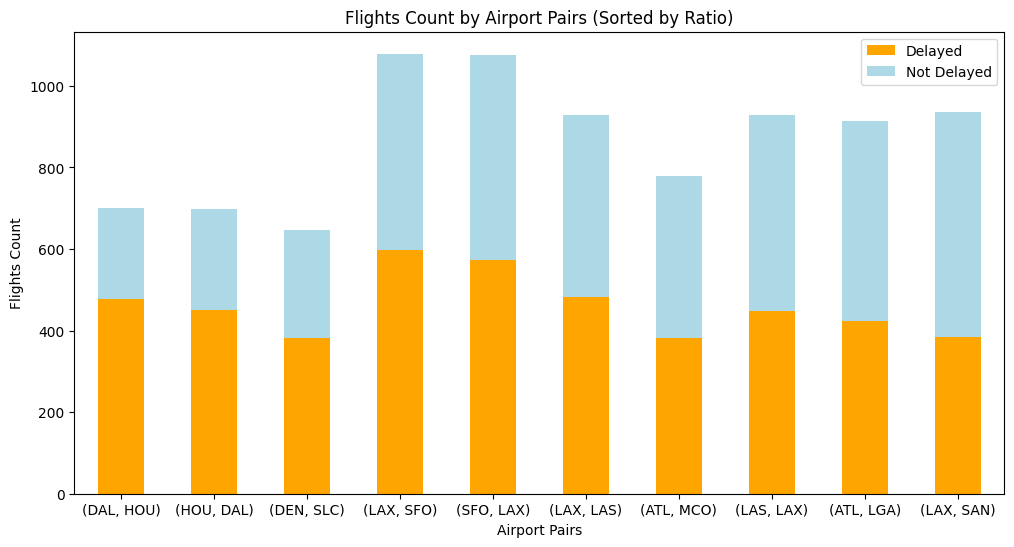

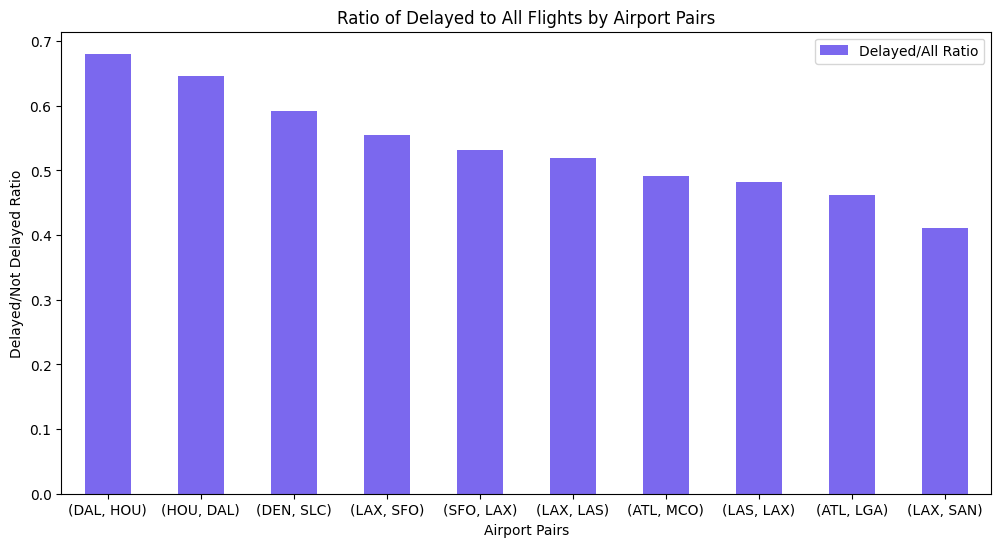

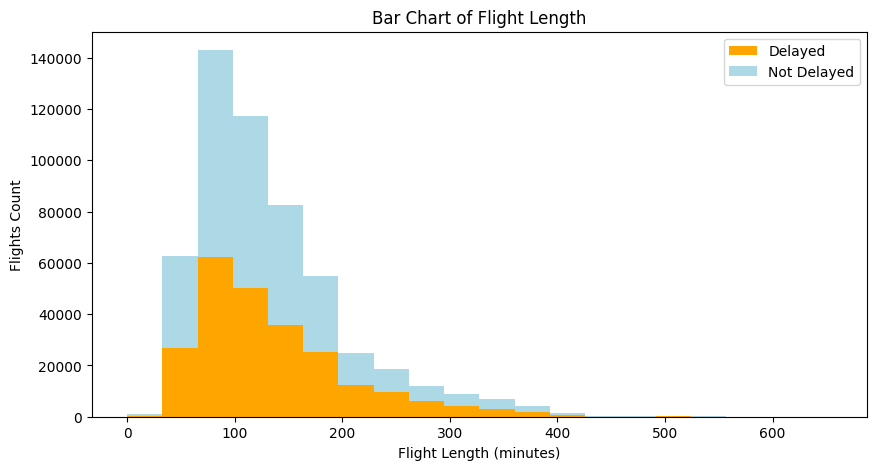

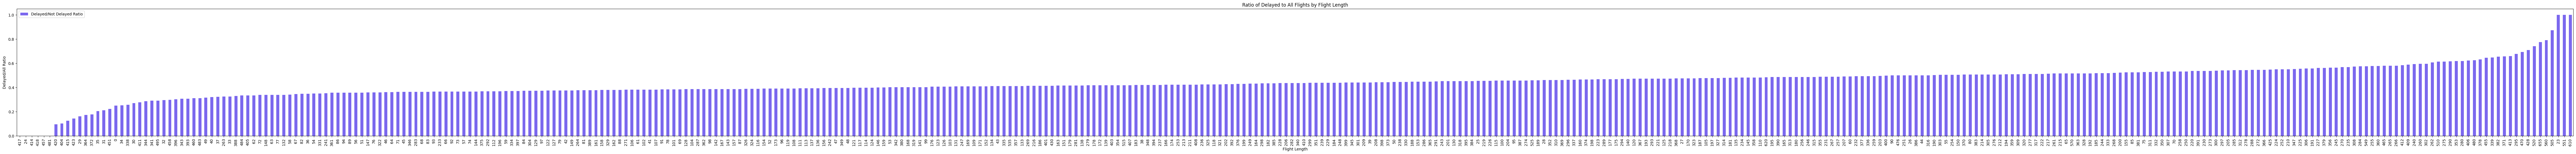

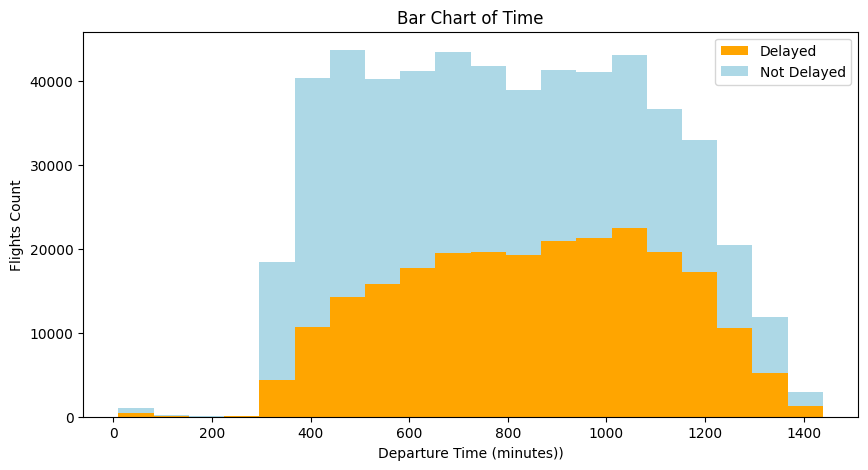

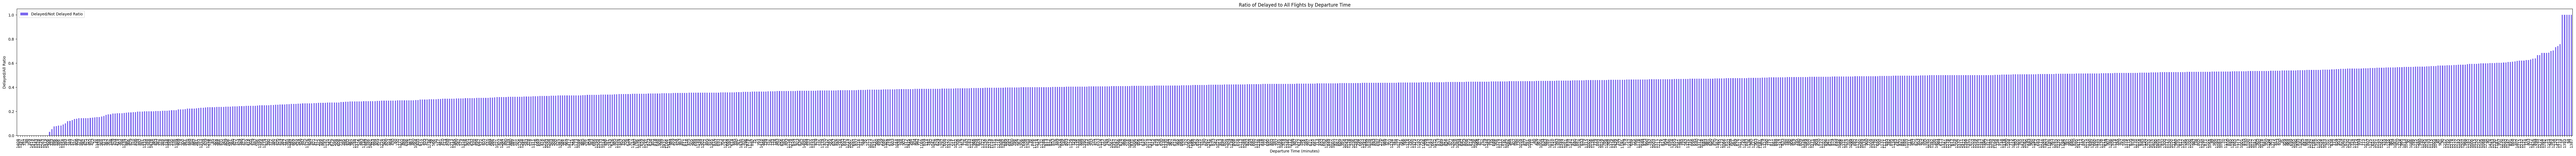

In [3]:
print("\ndata head:")
print(df.head()) #Check table composition

print("\ndata shape:")
print(df.shape) #How many entries are there? (Get height and width of Dataset)

print("\ndata info:")
print(df.info()) #Check for empty datatuple

print("\ndata discription:")
print(df.describe()) #Data visualization -> Mean etc.

#Outliers -> Only binary decision -> no problem
duplicate_values = df.duplicated()
if duplicate_values.any:
    print("\nNo duplicates")
else:    
    print("\nDuplicates found")
    print(duplicate_values)

#------------------------------------
duplicate_values = df['id'].duplicated()
if duplicate_values.any:
    print("\nNo duplicates id")
else:    
    print("\nDuplicates found id")
    print(duplicate_values)

#------------------------------------

colors = ['orange', 'lightblue']

# 1. Bar Chart of Delay Counts
delay_counts = df['Delay'].value_counts()
print(delay_counts)

plt.figure(figsize=(6, 4))
delay_counts.plot(kind='bar', color=['lightblue', 'orange']) 
plt.xlabel('Delayed (1) or Not Delayed (0)')
plt.ylabel('Count')
plt.title('Bar Chart of Delay Counts')
plt.xticks([0, 1], ['Not Delayed', 'Delayed'])
plt.show()


#2 Chart of Country and Delay Count
delay_counts_by_airline = df.groupby('Airline')['Delay'].agg(['sum', 'count'])
delay_counts_by_airline['ratio'] = delay_counts_by_airline['sum'] / delay_counts_by_airline['count']
delay_counts_by_airline = delay_counts_by_airline.sort_values(by='ratio', ascending=False)

plt.figure(figsize=(12, 6))
delay_counts_by_airline['sum'].plot(kind='bar', color=colors[0], label='Delayed')
(delay_counts_by_airline['count'] - delay_counts_by_airline['sum']).plot(kind='bar', bottom=delay_counts_by_airline['sum'], color=colors[1], label='Not Delayed')
plt.xlabel('Airline')
plt.ylabel('Flights Count')
plt.title('Flights Count by Airline (Sorted by Ratio)')
plt.legend(['Delayed', 'Not Delayed'])
plt.xticks(rotation=45)
plt.show()

# Ratio of Delayed to Not Delayed Flights by Airline
plt.figure(figsize=(12, 6))
delay_counts_by_airline['ratio'].plot(kind='bar', color="mediumslateblue")
plt.xlabel('Airline')
plt.ylabel('Delayed/All Ratio')
plt.title('Ratio of Delayed to All Flights by Airline')
plt.legend(['Delayed/Not Delayed Ratio'])
plt.xticks(rotation=45)
plt.show()

# 3. Bar Chart of Day of the Week vs. Delay Counts
day_counts = df.groupby('DayOfWeek')['Delay'].agg(['sum', 'count'])
day_counts['ratio'] = day_counts['sum'] / day_counts['count']
day_counts = day_counts.sort_values(by='DayOfWeek', ascending=True)

plt.figure(figsize=(12, 6))
day_counts['sum'].plot(kind='bar', color=colors[0], label='Delayed')
(day_counts['count'] - day_counts['sum']).plot(kind='bar', bottom=day_counts['sum'], color=colors[1], label='Not Delayed')
plt.xlabel('Weekday')
plt.ylabel('Flights Count')
plt.title('Flights Count by Weekday (Sorted by Ratio)')
plt.legend(['Delayed', 'Not Delayed'])
plt.xticks(rotation=0)
plt.show()

# Ratio of Delayed to Not Delayed Flights by Airline
plt.figure(figsize=(12, 6))
day_counts['ratio'].plot(kind='bar', color="mediumslateblue")
plt.xlabel('Weekday')
plt.ylabel('Delayed/All Ratio')
plt.title('Ratio of Delayed to All Flights by Weekday')
plt.legend(['Delayed/Not Delayed Ratio'])
plt.xticks(rotation=0)
plt.show()


# 4. Bar Chart of Airport Pairs and Delay Counts
airport_pairs_counts = df.groupby(['AirportFrom', 'AirportTo'])['Delay'].agg(['sum', 'count']).nlargest(10, 'sum')
airport_pairs_counts['ratio'] = airport_pairs_counts['sum'] / airport_pairs_counts['count']
airport_pairs_counts = airport_pairs_counts.sort_values(by='ratio', ascending=False)

plt.figure(figsize=(12, 6))
airport_pairs_counts['sum'].plot(kind='bar', color=colors[0], label='Delayed')
(airport_pairs_counts['count'] - airport_pairs_counts['sum']).plot(kind='bar', bottom=airport_pairs_counts['sum'], color=colors[1], label='Not Delayed')
plt.xlabel('Airport Pairs')
plt.ylabel('Flights Count')
plt.title('Flights Count by Airport Pairs (Sorted by Ratio)')
plt.legend(['Delayed', 'Not Delayed'])
plt.xticks(rotation=0)
plt.show()

# Ratio of Delayed to Not Delayed Flights by Airline
plt.figure(figsize=(12, 6))
airport_pairs_counts['ratio'].plot(kind='bar', color="mediumslateblue")
plt.xlabel('Airport Pairs')
plt.ylabel('Delayed/Not Delayed Ratio')
plt.title('Ratio of Delayed to All Flights by Airport Pairs')
plt.legend(['Delayed/All Ratio'])
plt.xticks(rotation=0)
plt.show()

# 5. Bar Chart of Flight Length
plt.figure(figsize=(10, 5))
plt.hist([df[df['Delay'] == 1]['Length'], df[df['Delay'] == 0]['Length']], bins=20, color=colors, stacked=True)
plt.xlabel('Flight Length (minutes)')
plt.ylabel('Flights Count')
plt.title('Bar Chart of Flight Length')
plt.legend(['Delayed', 'Not Delayed'])
plt.show()

length_counts = df.groupby(['Length'])['Delay'].agg(['sum', 'count'])
length_counts['ratio'] = length_counts['sum'] / length_counts['count']
length_counts = length_counts.sort_values(by='ratio', ascending=True)
# Ratio of Delayed to Not Delayed Flights by Airline
plt.figure(figsize=(120, 6))
length_counts['ratio'].plot(kind='bar', color="mediumslateblue")
plt.xlabel('Flight Length')
plt.ylabel('Delayed/All Ratio')
plt.title('Ratio of Delayed to All Flights by Flight Length')
plt.legend(['Delayed/Not Delayed Ratio'])
plt.xticks(rotation=90)
plt.show()

# 6. Bar Chart of Time
plt.figure(figsize=(10, 5))
plt.hist([df[df['Delay'] == 1]['Time'], df[df['Delay'] == 0]['Time']], bins=20, color=colors, stacked=True)
plt.xlabel('Departure Time (minutes))')
plt.ylabel('Flights Count')
plt.title('Bar Chart of Time')
plt.legend(['Delayed', 'Not Delayed'])
plt.show()

time_counts = df.groupby(['Time'])['Delay'].agg(['sum', 'count'])
time_counts['ratio'] = time_counts['sum'] / time_counts['count']
time_counts = time_counts.sort_values(by='ratio', ascending=True)
# Ratio of Delayed to Not Delayed Flights by Airline
plt.figure(figsize=(120, 6))
time_counts['ratio'].plot(kind='bar', color="mediumslateblue")
plt.xlabel('Departure Time (minutes)')
plt.ylabel('Delayed/All Ratio')
plt.title('Ratio of Delayed to All Flights by Departure Time')
plt.legend(['Delayed/Not Delayed Ratio'])
plt.xticks(rotation=90)
plt.show()




## Map

In [4]:
dfFrom = df["AirportFrom"].unique()
dfTo = df["AirportTo"].unique()

# Concatenate those two arrays to one
dfAirports = np.concatenate((dfFrom, dfTo), axis=None)

# Remove duplicates
dfAirports = np.unique(dfAirports)
print("\nAirports count:")
print(dfAirports.shape)

# Convert dfAirports to a DataFrame
dfAirports = pd.DataFrame({'iata_code': dfAirports})

# Convert 'iata_code' columns to strings
dfAirports['iata_code'] = dfAirports['iata_code'].astype(str)
allAirports['iata_code'] = allAirports['iata_code'].astype(str)

# Merge dataframes based on the 'iata_code' column
merged_dataframe = pd.merge(dfAirports, allAirports, on='iata_code', how='left')

print("\nmerged_dataframe:")
print(merged_dataframe.shape)


# Extract latitude and longitude from the 'coordinates' column
merged_dataframe[['longitude', 'latitude']] = merged_dataframe['coordinates'].str.split(', ', expand=True).astype(float)

# Create a folium map centered around the first entry
m = folium.Map(location=[merged_dataframe['latitude'].iloc[0], merged_dataframe['longitude'].iloc[0]], zoom_start=10)

# Add markers for each entry
for index, row in merged_dataframe.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['name']).add_to(m)

# Display the map
m




Airports count:
(293,)

merged_dataframe:
(293, 12)


# Stage 2: Data Preprocessing

In [5]:
# Select features and target variable
features = ['Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length']
target = 'Delay'
X = df[features]
y = df[target]

#Preprossing of the data
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)

encoder = preprocessing.OrdinalEncoder()
encoded = pd.DataFrame(encoder.fit_transform(X[['Airline', 'AirportFrom', 'AirportTo']]), columns = encoder.get_feature_names_out(['Airline', 'AirportFrom', 'AirportTo']))

X = X.drop(columns = ['Airline', 'AirportFrom', 'AirportTo'])
X = X.join(encoded)

# Separate continuous and categorical columns
continuous_cols = ['DayOfWeek', 'Time', 'Length']
categorical_cols = [col for col in X.columns if col not in continuous_cols]


# Apply StandardScaler only to continuous columns
scaler = StandardScaler()
X[continuous_cols] = scaler.fit_transform(X[continuous_cols])


print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% testing

        DayOfWeek      Time    Length  Airline  AirportFrom  AirportTo
0       -0.485552 -2.833092  1.038237      4.0        253.0      135.0
1       -0.485552 -2.833092  1.280689     14.0        217.0       60.0
2       -0.485552 -2.815110  0.467761      1.0        154.0       80.0
3       -0.485552 -2.815110  0.895618      1.0        253.0       80.0
4       -0.485552 -2.779144  0.995451      2.0         14.0      252.0
...           ...       ...       ...      ...          ...        ...
539378   0.559019  2.288369  2.763925      4.0        203.0      264.0
539379   0.559019  2.288369  2.464425      8.0        252.0       16.0
539380   0.559019  2.288369  1.751331      8.0        253.0      184.0
539381   0.559019  2.288369  2.578520     13.0        128.0      253.0
539382   0.559019  2.288369  2.407378     14.0        154.0      216.0

[539383 rows x 6 columns]
[1 1 1 ... 0 1 1]


# Different Models

## KNN

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


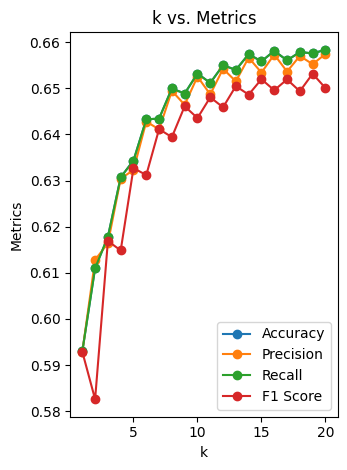

In [6]:
#K-Nearest-Neighbors
k_count = []
precisions = []
recalls = []
f1_scores = []
accuracies = []

k_range = 20 #rule of thumb 1-20
for k in range(1, k_range + 1):
    k_count.append(k)
    knn_estimator = KNeighborsClassifier(n_neighbors = k, algorithm='ball_tree')
    knn_estimator.fit(X_train, y_train)
    predicted_knn = knn_estimator.predict(X_test) 
    accuracy = accuracy_score(y_test, predicted_knn)
    accuracies.append(accuracy)
    precision = precision_score(y_test, predicted_knn, average='weighted')
    recall = recall_score(y_test, predicted_knn, average='weighted')
    f1 = f1_score(y_test, predicted_knn, average='weighted')
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    print(k)

plt.subplot(1, 2, 1)
plt.plot(k_count, accuracies, marker='o', label='Accuracy')
plt.plot(k_count, precisions, marker='o', label='Precision')
plt.plot(k_count, recalls, marker='o', label='Recall')
plt.plot(k_count, f1_scores, marker='o', label='F1 Score')
plt.title('k vs. Metrics')
plt.xlabel('k')
plt.ylabel('Metrics')
plt.legend()
plt.tight_layout()
plt.savefig("knn.pdf")
plt.show()


## Naive Bayes

In [7]:
#Create an NB Classifier
nb_estimator = GaussianNB()

# Train the classifier on the training set
nb_estimator.fit(X_train,y_train)

# Make predictions on the testing set
y_pred = nb_estimator.predict(X_test)

# Calculate and print the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate and print precision, recall, and f1-score
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

f1 = f1_score(y_pred, y_test, average="weighted")
print("F1 Score:", f1)

Accuracy: 0.5819034641304448
Precision: 0.5450780106505558
Recall: 0.36466102754281426
F1 Score: 0.5988772205297175


## Random Forest

Max Depth: 1, Accuracy: 0.5942137805092838, Precision: 0.6784114913392479, Recall: 0.16727780324180175, f1: 0.26838032523858074


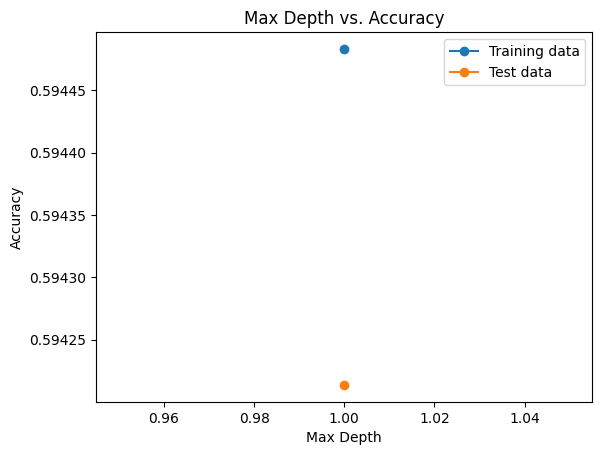

Max Depth: 2, Accuracy: 0.6196223476737396, Precision: 0.6969902692916949, Recall: 0.25667736155673154, f1: 0.37518652739288


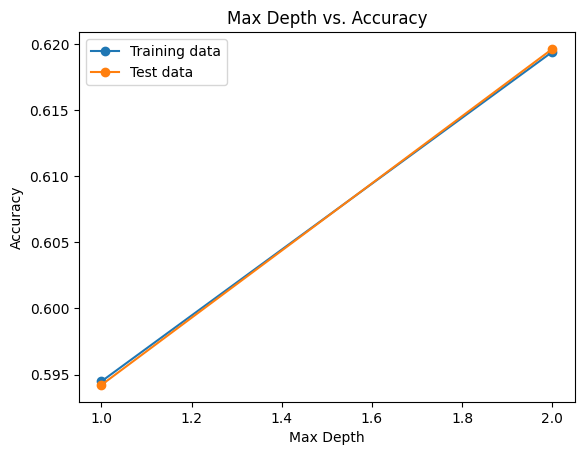

Max Depth: 3, Accuracy: 0.6215411996996579, Precision: 0.7028571428571428, Recall: 0.25882328430351265, f1: 0.37832899365035855


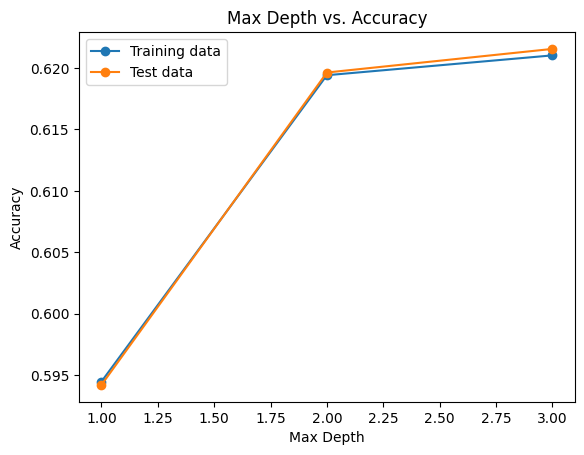

Max Depth: 4, Accuracy: 0.6293000361522846, Precision: 0.752713961120929, Recall: 0.24846868619525814, f1: 0.3736098493154977


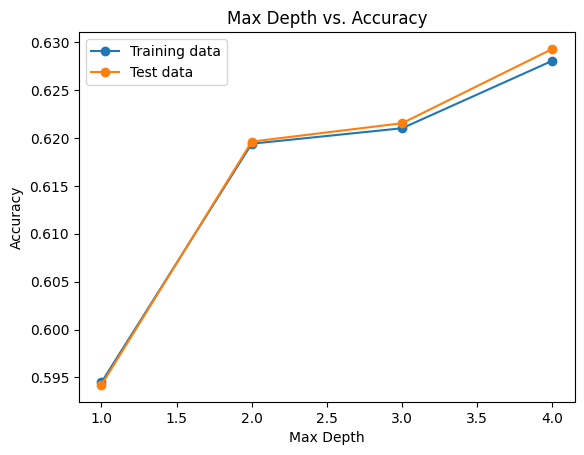

KeyboardInterrupt: 

In [8]:
# Create arrays to store max_depth and corresponding accuracies
depths = []
accuracies = []
trainAccuracies = []

# Loop through max depths
for max_tree_depth in range(1, 25):

    # Create a Random Forest classifier within a pipeline
    clf = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=100, criterion='gini', max_depth= max_tree_depth))])

    # Train the classifier on the training set
    clf.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = clf.predict(X_test)

    # For comparison predict on training data
    y_predTrain = clf.predict(X_train)
    trainAccuracy = accuracy_score(y_train, y_predTrain) # calculate accuracy for comparison
    
    # Calculate the accuracy, precision, recall and f1 of the classifier
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred) #just out of interest
    recall = recall_score(y_test, y_pred)  #just out of interest
    f1 = f1_score(y_test, y_pred) #just out of interest

    print(f"Max Depth: {max_tree_depth}, Test Accuracy:  {accuracy}, Precision: {precision}, Recall: {recall}, f1: {f1}")
    print(f"Max Depth: {max_tree_depth}, Train Accuracy: {trainAccuracy}")
    
    # Store depth and accuracy in arrays
    depths.append(max_tree_depth)
    accuracies.append(accuracy)
    trainAccuracies.append(trainAccuracy)

# Plotting the graph
plt.plot(depths, trainAccuracies, marker= 'o', label = "Training data")
plt.plot(depths, accuracies, marker='o', label = "Test data")
plt.title('Max Depth vs. Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Neural Network

In [ ]:
# MLPClassifier with 10 hidden layers, learning rate = 0.01 and mayximum iterations = 500    
neuralnet = MLPClassifier(hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=500)

# Train the neural network
neuralnet.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = neuralnet.predict(X_test)

# Calculate and print the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate and print precision, recall, and f1-score
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

## Decision Tree

Max Depth: 1, Test Accuracy:  0.5956876813407863, Precision: 0.5787789443405724, Recall: 0.3353681403391808, f1: 0.4246669304841049
Max Depth: 1, Train Accuracy: 0.5967054919282698
Max Depth: 2, Test Accuracy:  0.6247578260426226, Precision: 0.700351774864087, Recall: 0.2737614067252802, f1: 0.3936488915518274
Max Depth: 2, Train Accuracy: 0.6232566870449079
Max Depth: 3, Test Accuracy:  0.6261668381582729, Precision: 0.7691605839416058, Recall: 0.22832201341722572, f1: 0.35211901166340004
Max Depth: 3, Train Accuracy: 0.6243945623004084
Max Depth: 4, Test Accuracy:  0.6309500634982433, Precision: 0.6135556542004217, Recall: 0.46074836451518814, f1: 0.5262844768092144
Max Depth: 4, Train Accuracy: 0.6278128229966675
Max Depth: 5, Test Accuracy:  0.6377633786627362, Precision: 0.6583590726736962, Recall: 0.3863494312263011, f1: 0.4869428215059411
Max Depth: 5, Train Accuracy: 0.6368254439103975
Max Depth: 6, Test Accuracy:  0.6401364516996209, Precision: 0.6667393437261528, Recall: 0.38

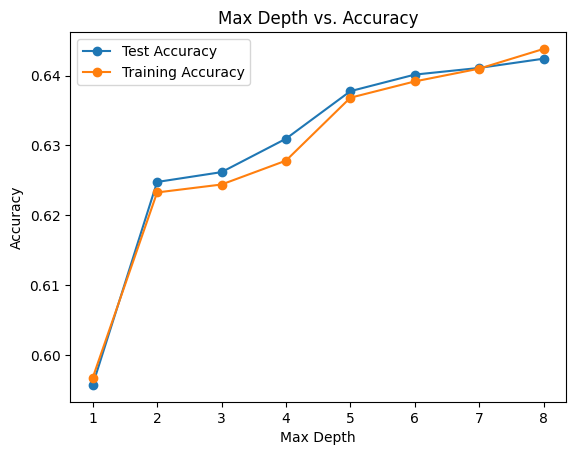

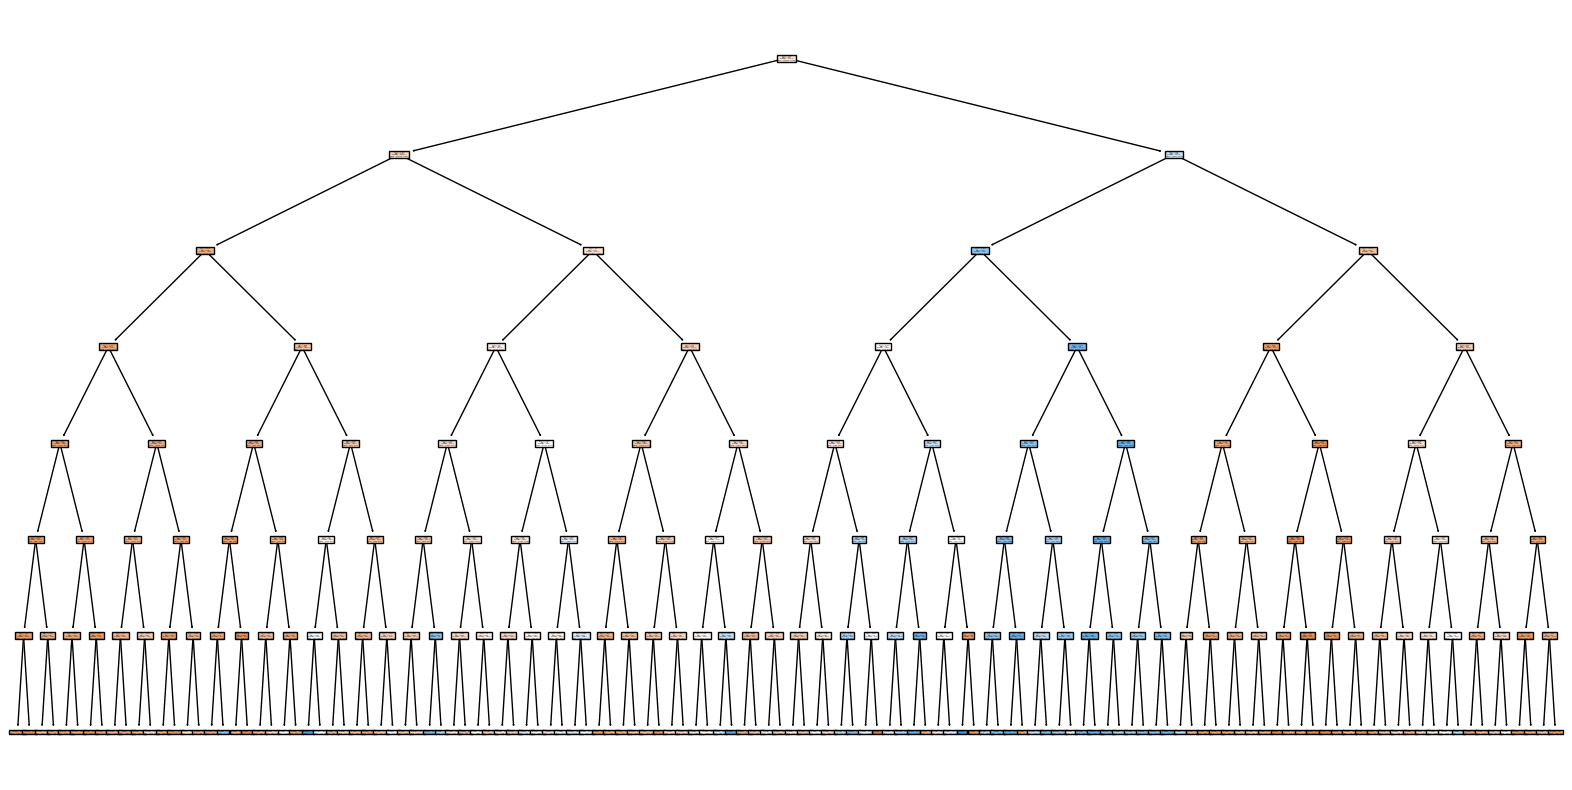

In [13]:
# Create arrays to store max_depth and corresponding accuracies
depths = []
accuracies = []
trainingAccuracies = []

# Loop through max depths from 1 to 25
for max_tree_depth in range(1, 9):

    # Create a Decision Tree classifier within a pipeline
    clf = Pipeline([
        ('classifier', DecisionTreeClassifier(max_depth=max_tree_depth, random_state=42))
    ])

    # Train the classifier on the training set
    clf.fit(X_train, y_train)

    if max_tree_depth == 7:
        clfSeven = clf

    # Make predictions on the testing set
    y_pred = clf.predict(X_test)
    y_test_pred = clf.predict(X_train)

    # Calculate the accuracy, precision, recall and f1 of the classifier
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    trainAccuracy = accuracy_score(y_train, y_test_pred)

    print(f"Max Depth: {max_tree_depth}, Test Accuracy:  {accuracy}, Precision: {precision}, Recall: {recall}, f1: {f1}")
    print(f"Max Depth: {max_tree_depth}, Train Accuracy: {trainAccuracy}")

    # Store depth and accuracy in arrays
    depths.append(max_tree_depth)
    accuracies.append(accuracy)
    trainingAccuracies.append(trainAccuracy)

# Plotting the graph
plt.plot(depths, accuracies, marker='o', label = "Test Accuracy")
plt.plot(depths, trainingAccuracies, marker ='o', label = "Training Accuracy")
plt.title('Max Depth vs. Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("graphs/dtAcc.pdf")
plt.show()

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clfSeven['classifier'], filled=True)
plt.savefig("graphs/dt.pdf")
plt.show()

In [17]:
# For loop code DT
# Get all combinations of columns
data = []
big_data = []
max_tree_depth = 7

column_combinations = []
for r in range(1, len(features) + 1):
    column_combinations.extend(itertools.combinations(features, r))

# Iterate through each combination
for combination in column_combinations:
    # Create a new DataFrame for the current combination
    x_run_train = X_train[list(combination)].copy()
    x_run_test = X_test[list(combination)].copy()

    # Create a Decision Tree classifier within a pipeline
    clf = Pipeline([
        ('classifier', DecisionTreeClassifier(max_depth=max_tree_depth,random_state=42)) 
    ])

    # Train the classifier on the training set with selected columns
    clf.fit(x_run_train, y_train)

    # Make predictions on the testing set with selected columns
    y_pred = clf.predict(x_run_test)

    # Calculate and print the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)
    # Calculate and print precision, recall, and f1-score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    
    #add combination, accuracy, precision, recall, f1 as an array inot the data array
    big_data.append([max_tree_depth,str(combination), accuracy, precision, recall, f1])

# add the value with the highest average to data
print(big_data)

max_accuracy = 0
for i in range(0, len(big_data)):
    if big_data[i][2] > max_accuracy:
        max_accuracy = big_data[i][2]
        j = i
data.append(big_data[j])

c:\Users\lisa-\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[7, "('Airline',)", 0.6297449873467004, 0.6753286323670236, 0.32324263510979623, 0.43721467621033644], [7, "('AirportFrom',)", 0.5710299693169072, 0.5668789808917197, 0.15204800200008334, 0.23978183729793667], [7, "('AirportTo',)", 0.5742929447426235, 0.5390583804143126, 0.2981790907954498, 0.3839673767237216], [7, "('DayOfWeek',)", 0.5550673452172381, 0.0, 0.0, 0.0], [7, "('Time',)", 0.5743300240088248, 0.5277644166533055, 0.4114754781449227, 0.4624209786935144], [7, "('Length',)", 0.5604252991833292, 0.5174559072239672, 0.17848660360848367, 0.2654211977569167], [7, "('Airline', 'AirportFrom')", 0.6314969826747129, 0.6569698815824544, 0.3594733113879745, 0.46468536647769354], [7, "('Airline', 'AirportTo')", 0.6303382556059216, 0.6508508582893662, 0.3649527063627651, 0.46766873131140535], [7, "('Airline', 'DayOfWeek')", 0.6314969826747129, 0.6551153252812583, 0.3627442810117088, 0.46693932282936645], [7, "('Airline', 'Time')", 0.6402476894982249, 0.6385262459673772, 0.4412267177799075

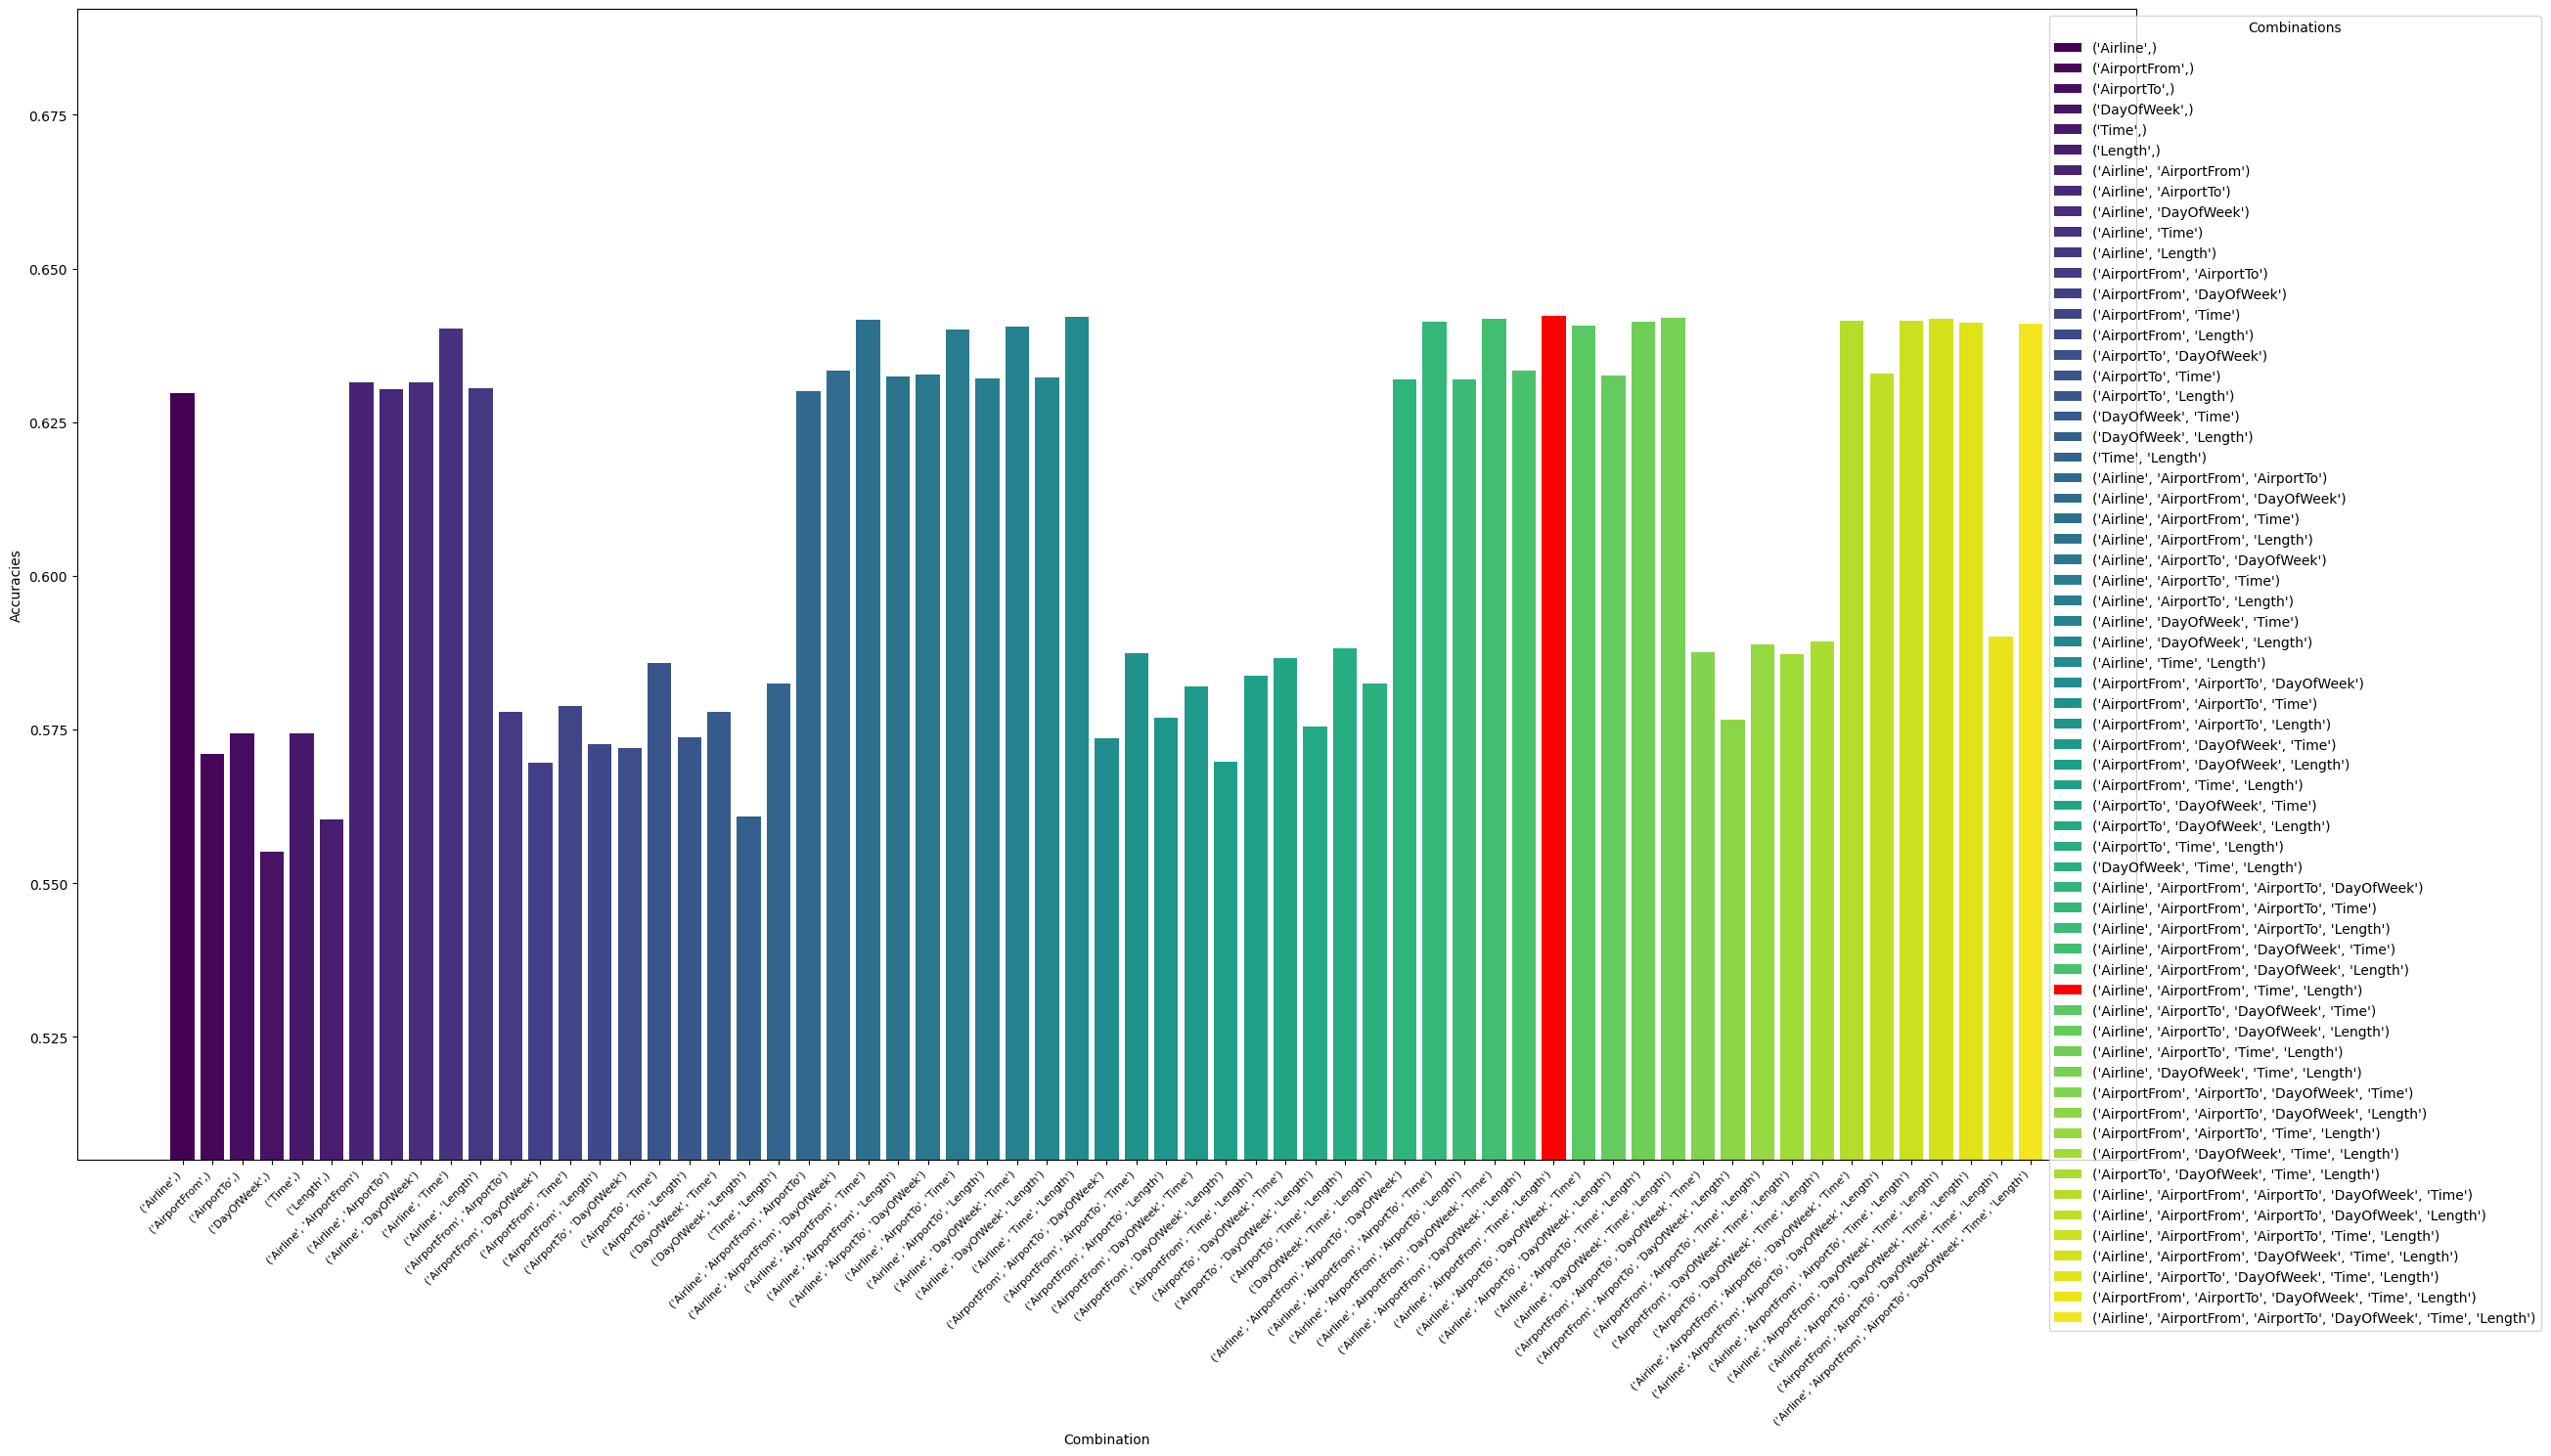

In [18]:
# Extrahiere die benötigten Daten
combinations = [str(entry[1]) for entry in big_data]
accuracies = [entry[2] for entry in big_data]

# Festlegen von verschiedenen Farben für jeden Balken
colors = plt.cm.viridis(np.linspace(0, 1, len(combinations)))

# Find the index of the maximum accuracy value
max_acc_index = np.argmax(accuracies)

# Create a list of colors, setting 'red' for the maximum average value and 'viridis' for others
highlighted_colors = ['red' if i == max_acc_index else plt.cm.viridis(i / len(combinations)) for i in range(len(combinations))]

# Plot
fig, ax = plt.subplots(figsize=(26, 15))
bars = ax.bar(combinations, accuracies, color=highlighted_colors)

# Reduziere die Anzahl der x-Achsenbeschriftungen
x_ticks = range(0, len(combinations), 1)  # Adjust the step size according to your preference
plt.xticks(x_ticks, [combinations[i] for i in x_ticks], rotation=45, ha='right', fontsize=8)  # Rotate labels by 45 degrees

# Set y-axis limits for better visibility
plt.ylim(min(accuracies) - 0.05, max(accuracies) + 0.05)

# Achsentitel hinzufügen
plt.xlabel('Combination')
plt.ylabel('Accuracies')

# Farblegende hinzufügen
plt.legend(bars, combinations, title='Combinations', loc='upper right', bbox_to_anchor=(1.2, 1))

# Vergrößere den Abstand zwischen den Balken
plt.tight_layout()

# Diagramm anzeigen
plt.savefig("graphs/dtCombinations7")
plt.show()